### Overfit-Underfit Diagnosis, Voting algorithms, Bagging and Boosting

In [1]:
import pandas as pd
datas=pd.read_csv('mpg.csv')
datas = datas[datas.horsepower != '?']
#datas.describe(include='all')
y=datas.iloc[:,0]
x=datas.iloc[:,1:8]

In [2]:
datas.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
5      15.0
6      14.0
7      14.0
8      14.0
9      15.0
10     15.0
11     14.0
12     15.0
13     14.0
14     24.0
15     22.0
16     18.0
17     21.0
18     27.0
19     26.0
20     25.0
21     24.0
22     25.0
23     26.0
24     21.0
25     10.0
26     10.0
27     11.0
28      9.0
29     27.0
       ... 
367    28.0
368    27.0
369    34.0
370    31.0
371    29.0
372    27.0
373    24.0
375    36.0
376    37.0
377    31.0
378    38.0
379    36.0
380    36.0
381    36.0
382    34.0
383    38.0
384    32.0
385    38.0
386    25.0
387    38.0
388    26.0
389    22.0
390    32.0
391    36.0
392    27.0
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [4]:
x

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1
5,8,429.0,198,4341,10.0,70,1
6,8,454.0,220,4354,9.0,70,1
7,8,440.0,215,4312,8.5,70,1
8,8,455.0,225,4425,10.0,70,1
9,8,390.0,190,3850,8.5,70,1


In [5]:
# Import DecisionTreeRegressor from sklearn.tree
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import sklearn.model_selection as cv
from sklearn.tree import DecisionTreeRegressor
(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.20)
# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
                           min_samples_leaf=0.13,
                           random_state=3)

# Fit dt to the training set
dt.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.13,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=3, splitter='best')

In [6]:
# Accuracy

In [7]:
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(x_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.00


In [8]:
from sklearn.model_selection import cross_val_score
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, x_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 4.05


In [9]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(x_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(x_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 3.56


In [10]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)


# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 4.30


In [11]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 4.19


#### Upon reducing the model complexity data suffers from high bias because RMSE_CV ≈ RMSE_train and both scores are greater than baseline_RMSE

In [12]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=  6, min_samples_leaf= 0.19 , random_state=SEED)

#### Voting Classifier Example

In [13]:
# Import function to compute accuracy
from sklearn.metrics import accuracy_score
import pandas as pd
# Import function to split data
from sklearn.model_selection import train_test_split
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
# Import the VotingClassifier meta-model
from sklearn.ensemble import VotingClassifier
# Set seed for reproducibility

/Users/zhongyizhang/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [14]:
data=pd.read_csv('breast_data.csv')
data.diagnosis[data.diagnosis == 'M'] = 1
data.diagnosis[data.diagnosis == 'B'] = 0
y=data.iloc[:,1].values
y=y.astype('int')
cols=['concave points_mean','radius_mean']
X=data[cols].values

/Users/zhongyizhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/zhongyizhang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
SEED=1
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size= 0.3,
random_state= SEED)
# Instantiate individual classifiers
lr = LogisticRegression(random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)
# Define a list called classifier that containsj
# the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
('K Nearest Neighbours', knn),
('Classification Tree', dt)]

In [16]:
for clf_name, clf in classifiers:
#fit clf to the training set
    clf.fit(X_train, y_train)
# Predict the labels of the test set
    y_pred = clf.predict(X_test)
# Evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name,
    accuracy_score(y_test, y_pred)))

Logistic Regression : 0.865
K Nearest Neighbours : 0.883
Classification Tree : 0.883


In [74]:
vc = VotingClassifier(estimators=classifiers)
# Fit 'vc' to the traing set
vc.fit(X_train, y_train)
# Predict test set labels
y_pred = vc.predict(X_test)
# Evaluate the test-set accuracy of 'vc'


accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.889


/Users/zhongyizhang/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


#### Bagging Classifier

In [75]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Set seed for reproducibility
SEED = 1
# Split data into train and test
X_train, X_test, y_train, y_test = \
train_test_split(X, y,
test_size=0.2,
stratify=y,
random_state=SEED)

In [76]:
# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16,
random_state=SEED)
# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt, n_estimators=300,
n_jobs=-1)
# Fit 'bc' to the training set
bc.fit(X_train, y_train)
# Predict test set labels
y_pred = bc.predict(X_test)
# Evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))


Accuracy of Bagging Classifier: 0.904


#### Random Forest and Feature Importance

#### Random Forests Algorithm
The random forests algorithm is very much like the bagging algorithm. Let N be the number of observations and assume for now that the response variable is binary.

Take a random sample of size N with replacement from the data (bootstrap sample).

Take a random sample without replacement of the predictors.

Construct a split by using predictors selected in Step 2.

Repeat Steps 2 and 3 for each subsequent split until the tree is as large as desired. Do not prune. Each tree is produced from a random sample of cases and at each split a random sample of predictors.

Drop the out-of-bag data down the tree. Store the class assigned to each observation along with each observation's predictor values.

Repeat Steps 1-5 a large number of times (e.g., 500).

For each observation in the dataset, count the number of trees that it is classified in one category over the number of trees.

Assign each observation to a final category by a majority vote over the set of trees. Thus, if 51% of the time over a large number of trees a given observation is classified as a "1", that becomes its classification.

 

##### Why Random Forests Work
Variance reduction: the trees are more independent because of the combination of bootstrap samples and random draws of predictors.

It is apparent that random forests are a form of bagging, and the averaging over trees can substantially reduce instability that might otherwise result. Moreover, by working with a random sample of predictors at each possible split, the fitted values across trees are more independent. Consequently, the gains from averaging over a large number of trees (variance reduction) can be more dramatic.
Bias reduction: a very large number of predictors can be considered, and local feature predictors can play a role in tree construction.

Random forests are able to work with a very large number of predictors, even more, predictors than there are observations. An obvious gain with random forests is that more information may be brought to reduce bias of fitted values and estimated splits.

There are often a few predictors that dominate the decision tree fitting process because on the average they consistently perform just a bit better than their competitors. Consequently, many other predictors, which could be useful for very local features of the data, are rarely selected as splitting variables. With random forests computed for a large enough number of trees, each predictor will have at least several opportunities to be the predictor defining a split. In those opportunities, it will have very few competitors. Much of the time a dominant predictor will not be included. Therefore, local feature predictors will have the opportunity to define a split.

Indeed, random forests are among the very best classifiers invented to date (Breiman, 2001a).

Random forests include 3 main tuning parameters.

Node Size: unlike in decision trees, the number of observations in the terminal nodes of each tree of the forest can be very small. The goal is to grow trees with as little bias as possible.

Number of Trees: in practice, 500 trees is often a good choice.

Number of Predictors Sampled: the number of predictors sampled at each split would seem to be a key tuning parameter that should affect how well random forests perform. Sampling 2-5 each time is often adequate.

In [77]:
datas=pd.read_csv('mpg.csv')
datas = datas[datas.horsepower != '?']
y=datas.iloc[:,0]

X=datas.iloc[:,1:8]

In [78]:
# Basic imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
# Set seed for reproducibility
SEED = 1
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = \
train_test_split(X, y,
test_size=0.3,
random_state=SEED)

In [79]:
# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=400,
min_samples_leaf=0.12,
random_state=SEED)
# Fit 'rf' to the training set
rf.fit(X_train, y_train)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)
y_pred_train=rf.predict(X_train)
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)
rmse_train = MSE(y_train, y_pred_train)**(1/2)
# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))
print('Train set RMSE of rf: {:.2f}'.format(rmse_train))

Test set RMSE of rf: 4.24
Train set RMSE of rf: 3.44


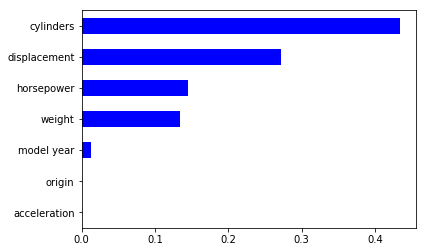

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_,
index = X.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='blue')
plt.show()

#### Boosting

In [81]:
dff=pd.read_csv('liver.csv')
dff['is_male'] = dff['gender'].apply(lambda x: 1 if x == 'Male' else 0)
dff= dff.drop('gender', axis=1)
dff.dropna(inplace=True)
dff['is_patient']= dff['is_patient'].apply(lambda x: 1 if x == 1 else 0)

In [82]:
#df.head()
y=dff.loc[:,'is_patient']

X=dff.iloc[:,1:11]
X=X.drop(['is_patient'], axis=1)

In [83]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
# Set seed for reproducibility
SEED = 1
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = \
train_test_split(X, y,
test_size=0.3,
stratify=y,
random_state=SEED)

In [84]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

In [85]:
# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

In [86]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.67


In [87]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=400,
min_samples_leaf=0.12,
random_state=SEED)
rf.fit(X_train, y_train)
y_pred_proba_rf = rf.predict_proba(X_test)[:,1]

In [88]:
#y_pred_proba_rf = rf.predict_proba(X_test)[:,1]
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
rf_roc_auc = roc_auc_score(y_test, y_pred_proba_rf)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(rf_roc_auc))

ROC AUC score: 0.68


#### Voting Classifier in detail

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np



# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate svm
#svm = SVC()

rf = RandomForestClassifier(n_estimators = 100,random_state=1)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('Classification Tree', dt),('Random Forest',rf)]#('Support Vectors', svm),

In [90]:
# Import accuracy_score
from sklearn.metrics import accuracy_score
for clf_name, clf in classifiers:
  
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
  
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
  
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.690
Classification Tree : 0.690
Random Forest : 0.695


In [42]:
# Import VotingCLassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc 
vc = VotingClassifier(estimators=classifiers, voting='hard')     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Hard Voting Classifier: {:.3f}'.format(accuracy))

Hard Voting Classifier: 0.701


/Users/utkupamuksuz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
# Import VotingCLassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc 
vc = VotingClassifier(estimators=classifiers, voting='soft')     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Soft Voting Classifier: {:.3f}'.format(accuracy))

Soft Voting Classifier: 0.718


/Users/utkupamuksuz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Gradient Boost

In [ ]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4,
                               n_estimators=200,
                               random_state=2)

# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred_Gboost = gb.predict(X_test)

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))
